In [3]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Reading the data from input csv file into a Pandas DataFrame
computers = pd.read_csv("computers.csv") 
# Printing the first 5 rows
computers.head()


,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


Text(0, 0.5, 'Minutes')

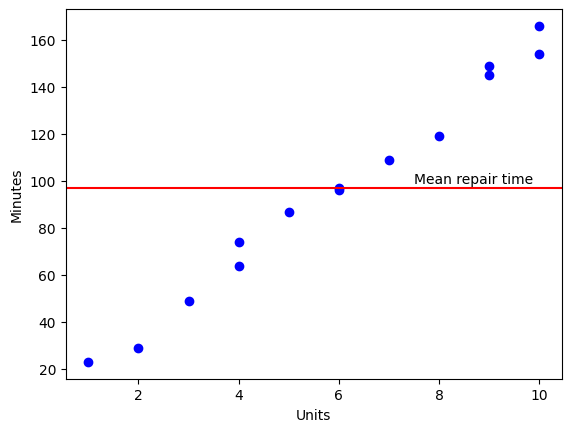

In [4]:
# Calculating the mean.
mean_value = computers['Minutes'].mean()
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers['Units'],computers['Minutes'],color='blue', marker='o')
# Plotting the mean
plt.axhline(y=mean_value,c="r")
# Adding annotation, xlabel and ylabel.
plt.annotate("Mean repair time",xy = (7.5,mean_value+2))
plt.xlabel("Units")
plt.ylabel("Minutes")


Text(0, 0.5, 'Minutes')

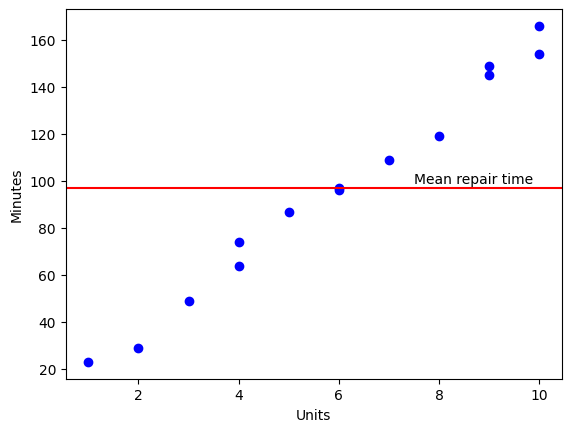

In [5]:
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers['Units'],computers['Minutes'],color='blue', marker='o')
# Plotting the mean
plt.axhline(y=mean_value,c="r")
# Adding annotation, xlabel and ylabel.
plt.annotate("Mean repair time",xy = (7.5,mean_value+2))
plt.xlabel("Units")
plt.ylabel("Minutes")


In [6]:
#Let us speculate a few linear regression models that can predict the value of time taken to repair a computer.
min_model0 = computers['Minutes'].mean()
min_model1 = 10 + 12*computers['Units']
min_model2 = 6 + 18*computers['Units']


KeyError: 'min_model0'

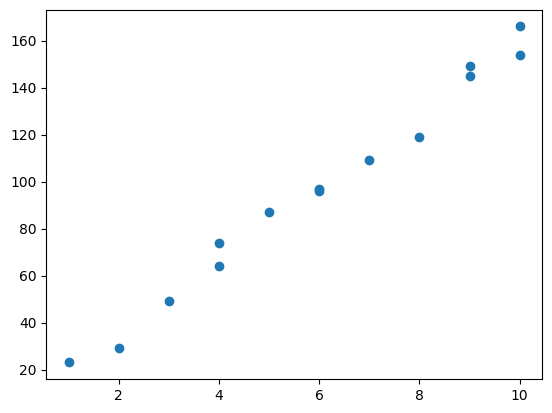

In [7]:
fig,ax = plt.subplots()
# Plotting the actual 'Minutes'
ax.scatter(x="Units",y="Minutes",data=computers,label='actual repair time')
# Plotting the Model0 predictions
ax.plot(computers['Units'],computers['min_model0'],color="red",label='model0')
# Plotting the Model1 predictions
ax.plot(computers['Units'],computers['min_model1'],color="green",label='model1')
# Plotting the Model2 predictions
ax.plot(computers['Units'],computers['min_model2'],color="black",label='model2')
# Adding xlabel, ylabel, title and legend 
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()


In [ ]:
# Sum of errors
print(sum(model0_obs['Error']))


In [ ]:
# read the data from input csv file
delivery = pd.read_csv("delivery.csv")
# view sample data
delivery.head()


In [ ]:
delivery.info()


In [ ]:
# Visualizing data
import seaborn as sns
sns.pairplot(delivery)


In [ ]:
# importing the required module to build the model
from sklearn.linear_model import LinearRegression
# Instantiating the algorithm for building the model
model = LinearRegression()
# selecting the predictors and targets
X = delivery[["n.prod","distance"]]
y = delivery["delTime"]
# building the model using fit() method
model.fit(X,y)
print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)
# Sample output for the above code
# Intercept: 2.3412311451922 
# Coefficients: [1.61590721 0.01438483]


In [ ]:

#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')#projection = '3d' is used to have 3D axes
#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")
#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1) 
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})
#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)
#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.4) # apha => transparency of the surface


In [ ]:
# finding the correlation
np.corrcoef(delivery["n.prod"],delivery["distance"])
# correlation value derived - 0.824215


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculating the VIF for each attributes
vif = pd.Series([variance_inflation_factor(X.values,idx) 
           for idx in range(X.shape[1])],
          index=X.columns)
print(vif)


In [ ]:
# score() method for regression model, returns the 'coefficient of determination' (r^2) value for the model
model.score(X,y)
# sample model score as output
#0.9595937494832257


In [ ]:
# Model with a single predictor - n.prod
model1 = LinearRegression()
features = ["n.prod"]
target = ["delTime"]
model1.fit(delivery[features],delivery[target])
print(model1.score(delivery[features],delivery[target]))
#sample model1 score
#0.9304813135986855
# Model with multiple predictors - n.prod,distance
model2 = LinearRegression()
features = ["n.prod","distance"]
target = ["delTime"]
model2.fit(delivery[features],delivery[target])
print(model2.score(delivery[features],delivery[target]))
#sample model2 score
#0.9595937494832257


In [ ]:
#computation of adjusted R-squared
X = delivery[features]
y = delivery[target]
adjusted_rscore = 1 - (1-model2.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_rscore)
#sample adjusted R-Squared
#0.9559204539817008


In [ ]:
#read data from input csv file
house_data_df = pd.read_csv("kc_house_data.csv")


In [ ]:
# this is a sample code to demonstrate encoding of the categorical column 'view' using get_dummies() function
# this is not complete code and hence not executable.
cat_features = [ "view"]
house_data_df = pd.get_dummies(house_data_df,columns=cat_features)
print(house_data_df.columns)


In [ ]:
#coronary heart disease
import pandas as pd

chd = pd.read_csv("chd_data.csv")
chd.head()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the 'chd' values against 'age' values
plt.scatter("age","chd",data=chd)
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Age vs. Coronary Heart Disease")

In [ ]:
# Importing the required class
from sklearn.model_selection import train_test_split
# Specifying the columns as predictor and target variable
predictors = ["age"]
target = "chd"
X = chd[predictors] # X contains the predictor values or input data 
y = chd[target] # y contains the target labels
# Spliting the data in training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Checking the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)



In [ ]:
# Importing the required class
from sklearn.linear_model import LogisticRegression
# Creating the object of the class LogisticRegression
model = LogisticRegression()
# Training the model using the training data
model.fit(X_train,y_train)
# Getting the intercept and the coefficients of the model
print("Intercept:",model.intercept_,"\nCoefficients:", model.coef_)


In [ ]:
# Creating a sample data
test=np.array([29]).reshape(1,-1)
# Predicting the probabilities for each of the class labels
print("Predicted probability for class '0' and '1' respectively:", model.predict_proba(test))
# Predicting the final class label or target value
print("\nPredicted target i.e. 'chd' value:",model.predict(test))


In [ ]:
print("Accuracy score of the model on training data:", model.score(X_train, y_train))
print("Accuracy score of the model on test data:", model.score(X_test, y_test))


In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Importing the dataset
credit_data = pd.read_csv("credit_risk.csv")


In [ ]:
credit_data.info()

In [ ]:
# Understanding the values the 'class' column (our target column in this analysis) can take
credit_data['class'].unique()


In [ ]:
# Selecting predictors as all columns except the 'class' column
X = credit_data.columns.drop("class")
# Setting the target as the 'class' column
y = credit_data['class']


In [ ]:
# Encoding all the features/predictor variables using the get_dummies method()
credit_data_encoded = pd.get_dummies(credit_data[X])
# Checking the shape of the input data
credit_data_encoded.shape


In [ ]:
credit_data_encoded.info()

In [ ]:
credit_data_encoded.columns


In [ ]:
# Importing the required module
from sklearn.model_selection import train_test_split
#splitting data into train and test datasets in 85:15 ratio
X_train,X_test,y_train,y_test = train_test_split(credit_data_encoded, y,test_size=0.15,random_state=100)
# Checking the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


In [ ]:
# Importing the required class.
from sklearn.linear_model import LogisticRegression
# Instantiating the required algorithm for model building.
model = LogisticRegression()
# Building the model based on the training data.
model.fit(X_train,y_train)


In [ ]:
# Getting the accuracy on training data
train_accuracy = model.score(X_train,y_train)
print("Train accuracy = ", train_accuracy)
# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Test accuracy = ", test_accuracy)


In [ ]:
# Predicting targets based on the model built
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
# Importing the required function
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train,train_predictions)
# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)


In [ ]:
# Confusion matrix for the test data
test_conf_matrix = confusion_matrix(y_test,test_predictions)
pd.DataFrame(test_conf_matrix,columns=model.classes_,index=model.classes_)


In [ ]:
# Calculating train accuracy from confusion matrix
train_correct_predictions = train_conf_matrix[0][0]+train_conf_matrix[1][1]
train_total_predictions = train_conf_matrix.sum()
train_accuracy = train_correct_predictions/train_total_predictions
print(train_accuracy)


In [ ]:
# Calculating test accuracy from confusion matrix
test_correct_predictions = test_conf_matrix[0][0]+test_conf_matrix[1][1]
total_predictions = test_conf_matrix.sum()
test_accuracy = test_correct_predictions/total_predictions
print(test_accuracy)


In [ ]:
# Importing the required function
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_test,test_predictions))


In [12]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Reading data from input csv file
credit_data = pd.read_csv("credit_risk.csv")
# Uncomment the following line to view the sample data
# credit_data.head()


In [13]:
# Understanding the various attributes
credit_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [14]:
# Selecting the predictor attributes
X = credit_data.columns.drop("class")
# Selecting  the target
y = credit_data['class']


In [15]:
# Encoding all the predictor variables to convert the categorical values to numerical values.
credit_data_encoded = pd.get_dummies(credit_data[X])
print("Total number of predictors after encoding = ", len(credit_data_encoded.columns))
# Printing the list of columns after encoding to understand the encoding process
credit_data_encoded.columns


Total number of predictors after encoding =  61


Index(['credit_usage', 'current_balance', 'location', 'residence_since',
       'cc_age', 'existing_credits', 'num_dependents', 'over_draft_0<=X<200',
       'over_draft_<0', 'over_draft_>=200', 'over_draft_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'Average_Credit_Balance_100<=X<500',
       'Average_Credit_Balance_500<=X<1000', 'Average_Credit_Balance_<100',
       'Average_Credit_Balance_>=1000',
       'Average_Credit_Balance_no known savings', 'employment_1<=X<4',
       'employment_4<=X<7', 'employment_<1', 'employment_>=7',
       'employment_unemployed', 'p

In [18]:
# Import the required function
from sklearn.model_selection import train_test_split
#splitting data into train and test datasets
X_train,X_test,y_train,y_test = train_test_split(credit_data_encoded, y,test_size=0.15,random_state=100) 
# Printing the shape of the resulting datasets
print("Shape of X_train and y_train are:", X_train.shape, "and", y_train.shape, " respectively")
print("Shape of X_test and y_test are:", X_test.shape, "and", y_test.shape, " respectively")
X_train
# Importing required class 
from sklearn.tree import DecisionTreeClassifier
# Creating an object of the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state = 1)
# Training model on the training data
model.fit(X_train,y_train)

Shape of X_train and y_train are: (850, 61) and (850,)  respectively
Shape of X_test and y_test are: (150, 61) and (150,)  respectively


DecisionTreeClassifier(random_state=1)

In [19]:
# Importing required class 
from sklearn.tree import DecisionTreeClassifier
# Creating an object of the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state = 1)
# Training model on the training data
model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=1)

In [20]:
# Predicting target values using the model built on training data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


In [40]:
# Importing the required libraries (Ensure that they are already installed.)
from sklearn.tree import export_graphviz
import graphviz
# Generating the tree
dot_data = export_graphviz(model, out_file=None,
                          feature_names=credit_data_encoded.columns,  
                          class_names=model.classes_,  
                          ) 
graph = graphviz.Source(dot_data) 
graph


ValueError: Length of feature_names, 61 does not match number of features, 2

In [ ]:
# Getting the accuracy on train data
train_accuracy = model.score(X_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)
# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Accuracy of the model on test data = ",test_accuracy)


In [ ]:
# Model 1:
# Min number of samples required in a set to split = 10
# Min reduction in impurity required for split to be included in the tree = 0.005
model1 = DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)
# Fitting the model to the training data
model1.fit(X_train,y_train)
# Measuring the accuracy of the model
print("train_accuracy = ", model1.score(X_train,y_train))
print("test_accuracy = ", model1.score(X_test,y_test))


In [24]:
#KNN
#reading data from input csv file
defaulter = pd.read_csv("defaulter.csv")
defaulter


,defaulter,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44
5,Yes,Yes,1289.2460,13624.55
6,No,Yes,673.8124,17672.29
7,No,No,870.4124,17685.45
8,No,Yes,903.1768,15810.57
9,No,Yes,879.6270,14898.31


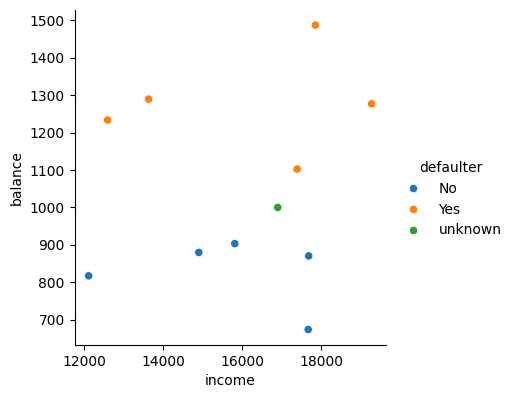

In [25]:
#visualizing data using seaborn - pariplot
import seaborn as sns
sns.pairplot(defaulter,hue="defaulter",
             x_vars="income",y_vars="balance",height=4)


In [26]:
# retrieving first data point from the dataset
x1 = defaulter.loc[0,["balance","income"]]
# retrieving second data point from the dataset
x2 = defaulter.loc[1,["balance","income"]]
# Euclidean distance between first and second data point
np.linalg.norm(x1-x2)
#output
#5787.1537602581275


np.float64(5787.1537602581275)

In [27]:
# considering 3 random datapoints - t1, t2, t3
t1 = np.array([26,1000])
t2 = np.array([66,1000])
t3 = np.array([36,10000])
# distance between t1 & t3
dist_t3_t1 = np.linalg.norm(t3-t1)
# distance between t2 & t3
dist_t2_t3 = np.linalg.norm(t2-t3)
print("Distance between t2 and t3",dist_t2_t3,
      "\nDistance between t1 and t3",dist_t3_t1)
#output
#Distance between t2 and t3 9000.049999861112 
#Distance between t1 and t3 9000.00555555384


Distance between t2 and t3 9000.049999861112 
Distance between t1 and t3 9000.00555555384


In [28]:
# Using MinMaxScaler of Scikit Learn library for Normalization of all features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(defaulter[["balance","income"]])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter


,defaulter,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587
6,No,Yes,673.8124,17672.29,0.000000,0.775630
7,No,No,870.4124,17685.45,0.241765,0.777463
8,No,Yes,903.1768,15810.57,0.282057,0.516203
9,No,Yes,879.6270,14898.31,0.253097,0.389082


In [29]:
#distance between two normalized data points
x1_n = defaulter.loc[0,["norm_balance","norm_income"]]
x2_n = defaulter.loc[1,["norm_balance","norm_income"]]
np.linalg.norm(x1_n-x2_n)
#output
#1.1489497815843785


np.float64(1.1489497815843788)

In [31]:
#reading input from csv file
iris_data = pd.read_csv("iris.csv")
iris_data.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
#creating new column 'v_nv', to distinguish versicolor species from rest
#the below lambda function returns 0 for 'versicolor' species and returns 1 for rest.
v_nv_fn = lambda x: 0 if x=="versicolor" else 1
# new column added into dataframe
iris_data["v_nv"] = iris_data["Species"].apply(v_nv_fn)
iris_data[iris_data['v_nv']==0].head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
50,7.0,3.2,4.7,1.4,versicolor,0
51,6.4,3.2,4.5,1.5,versicolor,0
52,6.9,3.1,4.9,1.5,versicolor,0
53,5.5,2.3,4.0,1.3,versicolor,0
54,6.5,2.8,4.6,1.5,versicolor,0


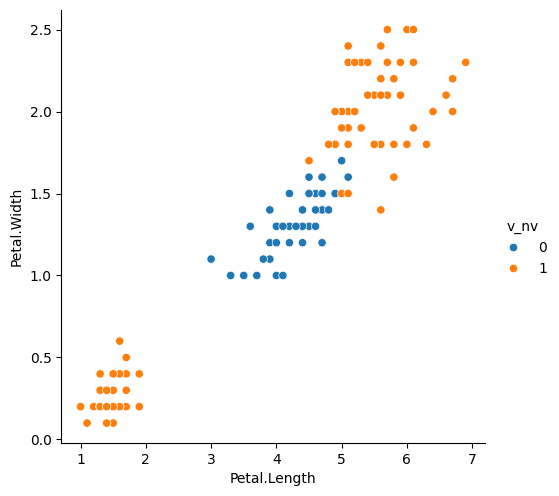

In [33]:
#visualization using seaborn - pairplot
import seaborn as sns
sns.pairplot(iris_data,
             x_vars = "Petal.Length",y_vars="Petal.Width",
             hue="v_nv",height=5)


In [34]:
#Support Vector Classification
from sklearn.svm import SVC
#setting predictors and target
X = iris_data[["Petal.Length","Petal.Width"]]
Y = iris_data["v_nv"]
# model building
model = SVC()
model.fit(X,Y)
model.score(X,Y)
# 0.9533333333333334


0.9533333333333334

C:\Users\Naomie  Fillies\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision boundary of SVM on iris data')

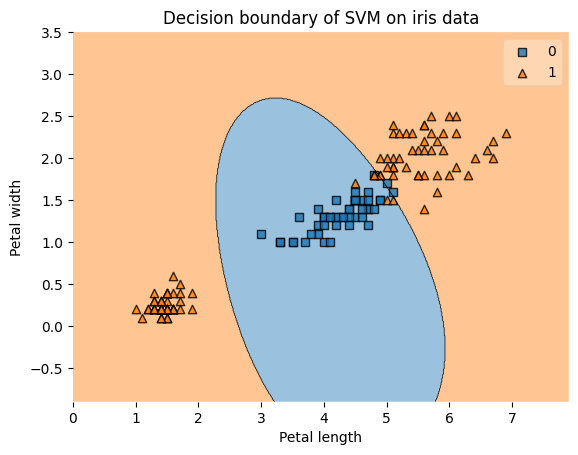

In [35]:
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y).ravel()
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Decision boundary of SVM on iris data')


In [37]:
#### Normalizing the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(defaulter[features_to_scale])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]


In [38]:
from sklearn.model_selection import train_test_split
X=defaulter[["norm_balance","norm_income"]]
Y=defaulter['defaulter']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all k neighbor values
param_grid = {'n_neighbors': np.arange(1, 15,2)}
'''using GridSearchCV to perform k-fold validation'''
knn_gscv = GridSearchCV(knn, param_grid,return_train_score=True, verbose=1,scoring='accuracy')
#fit model to data
knn_gscv.fit(X_train,Y_train)
#storing results to dataframe
#print(knn_gscv.cv_results_)
df=pd.DataFrame(knn_gscv.cv_results_)
#filtering out columns
df=df[['param_n_neighbors','mean_train_score','mean_test_score']]


Fitting 5 folds for each of 7 candidates, totalling 35 fits


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [41]:
#reading input data from csv file
spam_data = pd.read_csv("spambase.csv")


In [42]:
from sklearn.model_selection import train_test_split
features = spam_data.columns.drop('spam')
target = "spam"
X=spam_data[features]
Y=spam_data[target]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)


In [43]:
from sklearn.ensemble import RandomForestClassifier
# building model with RandomforestClassifier with 10 underlying Decision tree models/ estimators
model = RandomForestClassifier(n_estimators=10,
                               min_samples_split=20,
                               min_impurity_decrease=0.05)
model.fit(X_train,Y_train)
# Evaluate the model performance
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)
#output
#0.8633152173913043 0.8577633007600435


0.8888586956521739 0.8925081433224755


In [44]:
feature_imps = pd.DataFrame(np.array([features,
                                      model.feature_importances_]).T,
                            columns=["feature","importance"])
feature_imps.sort_values(by="importance",ascending=False)


,feature,importance
6,word_freq_remove,0.177571
51,char_freq_!,0.17107
52,char_freq_$,0.130031
23,word_freq_money,0.119886
15,word_freq_free,0.080072
54,capital_run_length_average,0.079896
20,word_freq_your,0.069969
24,word_freq_hp,0.067157
18,word_freq_you,0.054451
22,word_freq_000,0.049897


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#building AdaBoostClassifier with 10 models, also called as estimators.
model = AdaBoostClassifier(n_estimators=10)
model.fit(X_train,Y_train)
# Evaluating the model performance
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)
#output
#0.9195652173913044 0.9272529858849077


0.9195652173913044 0.9272529858849077


C:\Users\Naomie  Fillies\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [46]:
feature_imps = pd.DataFrame(np.array([features,
                                      model.feature_importances_]).T,
                            columns=["feature","importance"])
feature_imps.sort_values(by="importance",ascending=False)


,feature,importance
15,word_freq_free,0.1
45,word_freq_edu,0.1
55,capital_run_length_longest,0.1
52,char_freq_$,0.1
6,word_freq_remove,0.1
51,char_freq_!,0.1
26,word_freq_george,0.1
44,word_freq_re,0.1
24,word_freq_hp,0.1
36,word_freq_1999,0.1


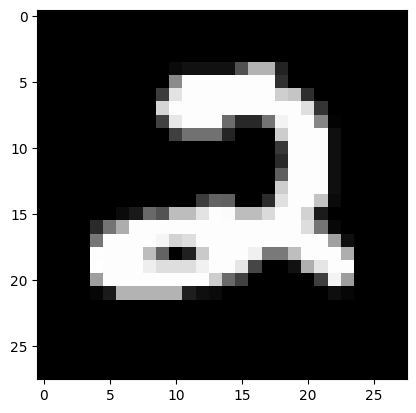

In [47]:
# Load the data from the file
mnist_data = pd.read_csv("mnist_data.csv")
# Plotting the first image in the data
im = np.asarray(mnist_data.iloc[0:1,:]).reshape(28,28)
plt.imshow(im,cmap=plt.cm.gray)


In [48]:
from sklearn.cluster import KMeans
# building K-Means model with 10 clusters
model = KMeans(n_clusters=10)
model.fit(mnist_data)
# Take a look at the cluster labels that are generated
# Note that these cluster labels do not indicate the digit in the images
print(np.unique(model.labels_))
#output
#[0 1 2 3 4 5 6 7 8 9]


C:\Users\Naomie  Fillies\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Naomie  Fillies\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Naomie  Fillies\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Naomie  Fillies\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(arg

[0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'First digit in test data ')

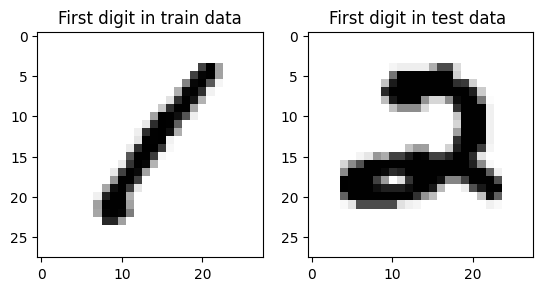

In [51]:
# Train data contains digit data and the correct labels
# Test data contains just the digit data and no labels 
mnist_train = pd.read_csv("train.csv")
mnist_test = pd.read_csv("test.csv")
# Let's visualize the image represented by the first rows of the train data and the test data
train_data_digit1 = np.asarray(mnist_train.iloc[0:1,1:]).reshape(28,28)
test_data_digit1 = np.asarray(mnist_test.iloc[0:1,]).reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(train_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in train data")
plt.subplot(1,2,2)
plt.imshow(test_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in test data ")


In [52]:
"""Let us now assign the label column value to a new variable Y_train 
and the remaining column values to X_train"""
X_train = mnist_train.iloc[:,1:]
Y_train = mnist_train.iloc[:,0:1]


In [53]:
from sklearn.neural_network import MLPClassifier
# Let us now create a neural network model to learn from train data
# We shall build a single hidden layer with 50 nodes. 
nn_model = MLPClassifier(hidden_layer_sizes=(50))
# The fit method initiates the learning process. When its execution completes, the model is learnt
nn_model.fit(X_train,mnist_train.iloc[:,0])
# Now that we have a model, lets get it to predict the value of the first digit in the test data
print(nn_model.predict(mnist_test.iloc[0:1,]))
# output
# [2]


[2]


In [54]:
from sklearn.metrics import classification_report
# report based on tain data
print(classification_report(Y_train,predicted_digit))


NameError: name 'predicted_digit' is not defined